The dataset can be of two types:

1. All the images are present in a single folder, and there is metadata with labels
2. The images are already separated into folders, based on their classes

This dataset already has the data in folders. 

Step 1: Set up the path to the images

In [3]:
train_path=r"C:\Users\pooja\Documents\SSN\Semester 6\Machine Learning Lab\Model Lab\Binary Image Classification\Data"
categories=["cats", "dogs"]

In [9]:


for i in categories:
    path=os.path.join(train_path,i)
    print(path)



C:\Users\pooja\Documents\SSN\Semester 6\Machine Learning Lab\Model Lab\Binary Image Classification\Data\cats
C:\Users\pooja\Documents\SSN\Semester 6\Machine Learning Lab\Model Lab\Binary Image Classification\Data\dogs


In [29]:
import os
import numpy as np
import tensorflow as tf

image_feature_list = []
image_target_list = []




for i in range(len(categories)):
    path = os.path.join(train_path, categories[i])
    for image_name in os.listdir(path):
        
        image_path = os.path.join(path, image_name)
            
            
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
        image_array = tf.keras.preprocessing.image.img_to_array(image)
            
       
        image_array /= 255.0
            
        
        image_feature_list.append(image_array)
        image_target_list.append(i)



image_feature_array = np.array(image_feature_list)
image_target_array = np.array(image_target_list)




In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(image_feature_array, image_target_array, test_size=0.2, random_state=42)

In [32]:

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train.reshape((len(X_train), -1)), y_train)  


perceptron_classifier = Perceptron()
perceptron_classifier.fit(X_train.reshape((len(X_train), -1)), y_train)


mlp_classifier = MLPClassifier(max_iter=1000)
mlp_classifier.fit(X_train.reshape((len(X_train), -1)), y_train)

MLPClassifier(max_iter=1000)

In [41]:
X_test.shape

(200, 256, 256, 3)

In [34]:
svm_predictions = svm_classifier.predict(X_test.reshape((len(X_test), -1)))
perceptron_predictions = perceptron_classifier.predict(X_test.reshape((len(X_test), -1)))
mlp_predictions = mlp_classifier.predict(X_test.reshape((len(X_test), -1)))

In [42]:
X_test.reshape((len(X_test), -1)).shape

(200, 196608)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
perceptron_accuracy = accuracy_score(y_test, perceptron_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

print("SVM Accuracy:", svm_accuracy)
print("Perceptron Accuracy:", perceptron_accuracy)
print("MLP Accuracy:", mlp_accuracy)



SVM Accuracy: 0.53
Perceptron Accuracy: 0.57
MLP Accuracy: 0.51


In [36]:
# Precision
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
perceptron_precision = precision_score(y_test, perceptron_predictions, average='weighted')
mlp_precision = precision_score(y_test, mlp_predictions, average='weighted')

print("SVM Precision:", svm_precision)
print("Perceptron Precision:", perceptron_precision)
print("MLP Precision:", mlp_precision)

SVM Precision: 0.5327053140096619
Perceptron Precision: 0.6754347826086956
MLP Precision: 0.584029304029304


In [37]:
# Recall
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
perceptron_recall = recall_score(y_test, perceptron_predictions, average='weighted')
mlp_recall = recall_score(y_test, mlp_predictions, average='weighted')

print("SVM Recall:", svm_recall)
print("Perceptron Recall:", perceptron_recall)
print("MLP Recall:", mlp_recall)

SVM Recall: 0.53
Perceptron Recall: 0.57
MLP Recall: 0.51


In [38]:
# F1-score
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
perceptron_f1 = f1_score(y_test, perceptron_predictions, average='weighted')
mlp_f1 = f1_score(y_test, mlp_predictions, average='weighted')

print("SVM F1-score:", svm_f1)
print("Perceptron F1-score:", perceptron_f1)
print("MLP F1-score:", mlp_f1)

SVM F1-score: 0.5294357743097239
Perceptron F1-score: 0.47615079365079366
MLP F1-score: 0.41308644887368795


In [39]:
# Confusion Matrix
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
perceptron_conf_matrix = confusion_matrix(y_test, perceptron_predictions)
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)

print("SVM Confusion Matrix:")
print(svm_conf_matrix)

print("Perceptron Confusion Matrix:")
print(perceptron_conf_matrix)

print("MLP Confusion Matrix:")
print(mlp_conf_matrix)


SVM Confusion Matrix:
[[55 41]
 [53 51]]
Perceptron Confusion Matrix:
[[ 13  83]
 [  3 101]]
MLP Confusion Matrix:
[[90  6]
 [92 12]]


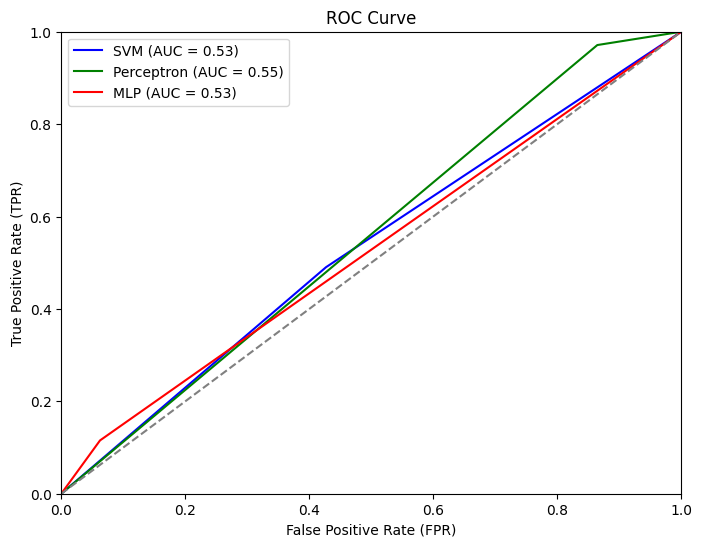

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)
svm_auc = roc_auc_score(y_test, svm_predictions)

perceptron_fpr, perceptron_tpr, _ = roc_curve(y_test, perceptron_predictions)
perceptron_auc = roc_auc_score(y_test, perceptron_predictions)

mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_predictions)
mlp_auc = roc_auc_score(y_test, mlp_predictions)

# Plottting the  ROC curve
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='blue')
plt.plot(perceptron_fpr, perceptron_tpr, label=f'Perceptron (AUC = {perceptron_auc:.2f})', color='green')
plt.plot(mlp_fpr, mlp_tpr, label=f'MLP (AUC = {mlp_auc:.2f})', color='red')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()
